In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.grid_search import GridSearchCV
import math

/Users/tetyanadzhula/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/tetyanadzhula/anaconda/lib/python2.7/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


# Encoding

In [ ]:
df['title'] =  df['title'].astype(str)

In [ ]:
df['title'] = df['title'].apply(lambda x: x.decode('unicode_escape').\
                                          encode('ascii', 'ignore').\
                                          strip())

In [ ]:
from langdetect import detect
from langdetect import detect_langs
detect_langs("Otec matka syn.")

In [ ]:
myList = []
for element in df['title']:
    try:
        if detect(element) == "en":
            myList.append('English')
        else:
            myList.append('Some Other Language')
    except:
        myList.append("Error")
        

len(myList)

In [ ]:
len(myList)

In [ ]:
df['conv_title'] = myList

In [ ]:
df['conv_title'].value_counts()

In [ ]:
df = df[df['conv_title'] == 'English']

In [2]:
# df.to_csv('features_df.csv', encoding='utf-8', index=False)
df = pd.read_csv('features_df.csv')

In [3]:
categories_dict = {'Crimea' :1, 'Culture and history' :2, 'Fighting in Eastern Ukraine':3, \
                   'Global discussions about Ukraine':4, 'Humanitarian crisis in Eastern Ukraine':5, \
                   'Life in DPR/LPR and near-front zone':6, 'Mentioning of Ukraine':7, \
                   'MH-17 crash':8,  'Military/humanitarian aid for Ukraine':9, 'Not related to Ukraine':10, \
                   'Other':11, 'Peace talks':12, 'Prisoners of war':13, 'Sanctions against Russia':14, 'Sport':15, \
                   'Ukrainian economy/industry':16, 'Ukrainian government and society':17, \
                   'Ukrainian international relations' :18, 'Emergencies in Ukraine':19, \
                  'Russian “humanitarian” aid':20}
    
df['c_label'] = df['topic_name'].apply(lambda x: categories_dict[x])

In [4]:
df.head(1)

,title,author,publisher_url,pub_week,pub_day,pub_month,social_fb,social_tw,impact_score,topic_name,hq_city,hq_country,is_ukr_press,editor,year,month,week,date,conv_title,c_label
0,Timing of Report by Flight's Pilot Focuses Inq...,NaN,nytimes.com,2014-11,2014-03-16,2014-03,4399.0,1877,6276,MH-17 crash,Unknown,Unknown,0.0,anonymous,2014,3.0,11.0,16.0,English,8


In [5]:
len(df)

102606

# Features

In [6]:
data = df.ix[:, ['title', 'c_label']]
data = data[data['c_label'] != 10]
data.dropna(inplace=True)
len(data)

90124

In [7]:
X = data['title']

In [8]:
y = data['c_label']

In [9]:
from sklearn.feature_extraction.text import CountVectorizer

In [10]:
cvec2 = CountVectorizer(stop_words='english', encoding=u'utf-8', min_df = 100)
cvec2.fit(X)
len(cvec2.get_feature_names())

1156

In [11]:
X = pd.DataFrame(cvec2.transform(X).todense(), columns=cvec2.get_feature_names())

In [12]:
X.columns

Index([u'000', u'10', u'100', u'11', u'12', u'13', u'14', u'15', u'16', u'17',
       ...
       u'yahoo', u'yanukovych', u'yarmolenko', u'yatseniuk', u'yatsenyuk',
       u'year', u'years', u'york', u'zee', u'zone'],
      dtype='object', length=1156)

In [13]:
X.head(2)

,000,10,100,11,12,13,14,15,16,17,...,yahoo,yanukovych,yarmolenko,yatseniuk,yatsenyuk,year,years,york,zee,zone
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
X_train, X_test, y_train, y_test = train_test_split(X.as_matrix(), y, 
                                                        test_size=0.30,
                                                        random_state=14)

# Naive Bayes

In [15]:
from sklearn import naive_bayes
naive_b_class = naive_bayes.MultinomialNB().fit(X_train, y_train)

In [16]:
from sklearn.model_selection import cross_val_score
print cross_val_score(naive_b_class, X_train, y_train)

[ 0.63898265  0.63461264  0.63446537]


In [17]:
cross_val_mean1 = cross_val_score(naive_b_class, X_train, y_train).mean()
cross_val_mean1

0.63602022058837016

In [18]:
naive_b_class.class_count_

array([ 5199.,   623.,  8308.,  7633.,   657.,   325.,   847.,  2129.,
        1569.,  5851.,  2163.,  1761.,  2092.,  5646.,  6187.,  7094.,
        4411.,   399.,   192.])

In [19]:
y_pred = naive_b_class.predict(X_test)

In [20]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          1       0.81      0.84      0.82      2225
          2       0.27      0.33      0.30       271
          3       0.64      0.68      0.66      3593
          4       0.52      0.52      0.52      3321
          5       0.42      0.39      0.41       295
          6       0.37      0.22      0.28       137
          7       0.48      0.39      0.43       371
          8       0.92      0.92      0.92       930
          9       0.53      0.56      0.54       636
         11       0.36      0.28      0.31      2444
         12       0.53      0.66      0.58       898
         13       0.77      0.87      0.82       805
         14       0.67      0.74      0.71       879
         15       0.88      0.87      0.88      2437
         16       0.67      0.74      0.71      2636
         17       0.60      0.58      0.59      3051
         18       0.54      0.47      0.50      1855
         19       0.54      0.63      0.58   

In [21]:
Xb = data['title']
yb = data['c_label']

In [22]:
cvec_2 = CountVectorizer(stop_words='english', encoding=u'utf-8', min_df = 50)
cvec_2.fit(Xb)
len(cvec_2.get_feature_names())

2066

In [23]:
Xb = pd.DataFrame(cvec_2.transform(Xb).todense(), columns=cvec_2.get_feature_names())

In [24]:
Xb.columns

Index([u'000', u'10', u'100', u'11', u'12', u'13', u'14', u'15', u'16', u'17',
       ...
       u'yatseniuk', u'yatsenyuk', u'year', u'years', u'york', u'young',
       u'youth', u'zee', u'zik', u'zone'],
      dtype='object', length=2066)

In [25]:
Xb_train, Xb_test, yb_train, yb_test = train_test_split(Xb, yb, 
                                                        test_size=0.30,
                                                        random_state=14)

In [26]:
naive_b_class2 = naive_bayes.MultinomialNB().fit(Xb_train, yb_train)

In [27]:
print cross_val_score(naive_b_class2, Xb_train, yb_train)

[ 0.662087    0.65896229  0.65800989]


In [28]:
y_pred2 = naive_b_class2.predict(Xb_test)

In [29]:
print(classification_report(yb_test, y_pred2))

             precision    recall  f1-score   support

          1       0.82      0.84      0.83      2225
          2       0.29      0.38      0.33       271
          3       0.68      0.69      0.68      3593
          4       0.52      0.54      0.53      3321
          5       0.45      0.45      0.45       295
          6       0.53      0.36      0.43       137
          7       0.51      0.42      0.46       371
          8       0.91      0.93      0.92       930
          9       0.54      0.60      0.57       636
         11       0.39      0.31      0.35      2444
         12       0.53      0.68      0.60       898
         13       0.79      0.88      0.83       805
         14       0.68      0.75      0.71       879
         15       0.90      0.91      0.90      2437
         16       0.72      0.77      0.75      2636
         17       0.64      0.60      0.62      3051
         18       0.57      0.49      0.53      1855
         19       0.57      0.74      0.64   

In [30]:
X3 = data['title']
y3 = data['c_label']

In [31]:
cvec_3 = CountVectorizer(stop_words='english', encoding=u'utf-8', min_df = 40)
cvec_3.fit(X3)
len(cvec_3.get_feature_names())

2462

In [32]:
X3 = pd.DataFrame(cvec_3.transform(X3).todense(), columns=cvec_3.get_feature_names())
X3.columns

Index([u'000', u'10', u'100', u'11', u'12', u'13', u'14', u'15', u'16', u'17',
       ...
       u'year', u'years', u'yes', u'yevhen', u'york', u'young', u'youth',
       u'zee', u'zik', u'zone'],
      dtype='object', length=2462)

In [33]:
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, 
                                                        test_size=0.30,
                                                        random_state=14)

In [34]:
naive_b_class3 = naive_bayes.MultinomialNB().fit(X3_train, y3_train)

In [35]:
print cross_val_score(naive_b_class3, X3_train, y3_train)

[ 0.66826717  0.66333761  0.664336  ]


In [36]:
y_pred3 = naive_b_class3.predict(X3_test)

In [37]:
print(classification_report(y3_test, y_pred3))

             precision    recall  f1-score   support

          1       0.82      0.84      0.83      2225
          2       0.29      0.39      0.33       271
          3       0.68      0.69      0.69      3593
          4       0.53      0.55      0.54      3321
          5       0.45      0.44      0.45       295
          6       0.53      0.33      0.41       137
          7       0.52      0.42      0.46       371
          8       0.91      0.93      0.92       930
          9       0.55      0.62      0.58       636
         11       0.40      0.32      0.36      2444
         12       0.54      0.68      0.60       898
         13       0.80      0.89      0.84       805
         14       0.68      0.76      0.72       879
         15       0.91      0.91      0.91      2437
         16       0.72      0.78      0.75      2636
         17       0.65      0.61      0.63      3051
         18       0.57      0.49      0.53      1855
         19       0.60      0.73      0.66   

In [38]:
X4 = data['title']
y4 = data['c_label']

In [39]:
cvec_4 = CountVectorizer(stop_words='english', encoding=u'utf-8', min_df = 35)
cvec_4.fit(X4)
len(cvec_4.get_feature_names())

2728

In [40]:
X4 = pd.DataFrame(cvec_4.transform(X4).todense(), columns=cvec_4.get_feature_names())
X4.columns

Index([u'000', u'10', u'100', u'1000', u'11', u'12', u'13', u'14', u'15',
       u'16',
       ...
       u'yes', u'yevhen', u'york', u'young', u'youth', u'zealand', u'zee',
       u'zik', u'zone', u'zoo'],
      dtype='object', length=2728)

In [41]:
X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y4, 
                                                        test_size=0.30,
                                                        random_state=14)

In [42]:
naive_b_class4 = naive_bayes.MultinomialNB().fit(X4_train, y4_train)

In [43]:
print cross_val_score(naive_b_class4, X4_train, y4_train)

[ 0.67083432  0.66543016  0.66666667]


In [44]:
cross_val_mean4 = cross_val_score(naive_b_class4, X4_train, y4_train).mean()

In [45]:
y_pred4 = naive_b_class4.predict(X4_test)

In [46]:
print(classification_report(y4_test, y_pred4))

             precision    recall  f1-score   support

          1       0.82      0.84      0.83      2225
          2       0.30      0.38      0.33       271
          3       0.69      0.69      0.69      3593
          4       0.53      0.55      0.54      3321
          5       0.46      0.45      0.45       295
          6       0.56      0.32      0.41       137
          7       0.53      0.42      0.47       371
          8       0.92      0.93      0.92       930
          9       0.54      0.61      0.57       636
         11       0.40      0.33      0.36      2444
         12       0.53      0.69      0.60       898
         13       0.80      0.89      0.84       805
         14       0.69      0.76      0.72       879
         15       0.91      0.91      0.91      2437
         16       0.73      0.78      0.75      2636
         17       0.65      0.61      0.63      3051
         18       0.58      0.50      0.54      1855
         19       0.59      0.72      0.65   

In [47]:
print 'Naive Bayes model improved by: (%)',  (cross_val_mean4 - cross_val_mean1)*100 

Naive Bayes model improved by: (%) 3.1623496623


# Logistic Regression  & Lasso

In [51]:
lr = LogisticRegression()
lr_model = lr.fit(X4_train, y4_train)

In [52]:
lr_ypred = lr_model.predict(X4_test)

In [53]:
print classification_report(y4_test, lr_ypred, labels=lr.classes_)

             precision    recall  f1-score   support

          1       0.88      0.90      0.89      2225
          2       0.44      0.17      0.25       271
          3       0.69      0.73      0.71      3593
          4       0.57      0.62      0.59      3321
          5       0.63      0.39      0.48       295
          6       0.76      0.32      0.45       137
          7       0.70      0.39      0.50       371
          8       0.98      0.92      0.95       930
          9       0.67      0.56      0.61       636
         11       0.41      0.39      0.40      2444
         12       0.64      0.60      0.62       898
         13       0.90      0.87      0.89       805
         14       0.76      0.77      0.77       879
         15       0.90      0.92      0.91      2437
         16       0.76      0.82      0.79      2636
         17       0.63      0.71      0.67      3051
         18       0.62      0.51      0.56      1855
         19       0.82      0.64      0.72   

In [54]:
cvs1 = cross_val_score(lr, X, y, cv=3)
cvs1

array([ 0.5135288 ,  0.60643787,  0.58333333])

In [55]:
cvs1 = cross_val_score(lr, X4, y4, cv=3)
cvs1

array([ 0.52407894,  0.6153923 ,  0.59352111])

In [56]:
def test_penalties(c_val):
    lr_l1 = LogisticRegression(C=c_val, penalty='l1', solver='liblinear')
    cvs = cross_val_score(lr_l1, X4, y4, cv=3, scoring='accuracy')
    return cvs

In [57]:
test_cs = pd.Series([.001, .01, .1, 1, 1.5, 2.5, 5, 10, 100]).to_frame('c_vals')
score_frame = pd.DataFrame([test_penalties(x) for x in test_cs['c_vals']]).mean(axis=1).to_frame('score')

final_scores = pd.concat([test_cs, score_frame], axis=1)
final_scores

,c_vals,score
0,0.001,0.227463
1,0.010,0.478731
2,0.100,0.566523
3,1.000,0.574258
4,1.500,0.568699
5,2.500,0.560277
6,5.000,0.549636
7,10.000,0.539173
8,100.000,0.506151


In [58]:
# best c value
final_scores['c_vals'][final_scores['score'].idxmax()]

1.0

In [59]:
logreg_cv = LogisticRegressionCV(Cs=20, solver='liblinear', cv=3, penalty='l1', scoring='accuracy')
cv_model = logreg_cv.fit(X4_train, y4_train)

In [60]:
print('best C for class:')
best_C = {logreg_cv.classes_[i]:x for i, (x, c) in enumerate(zip(logreg_cv.C_, logreg_cv.classes_))}
print(best_C)


best C for class:
{1: 0.61584821106602605, 2: 0.61584821106602605, 3: 1.623776739188721, 4: 0.61584821106602605, 5: 0.61584821106602605, 6: 1.623776739188721, 7: 0.61584821106602605, 8: 1.623776739188721, 9: 0.61584821106602605, 11: 0.61584821106602605, 12: 1.623776739188721, 13: 1.623776739188721, 14: 1.623776739188721, 15: 4.2813323987193961, 16: 1.623776739188721, 17: 1.623776739188721, 18: 1.623776739188721, 19: 1.623776739188721, 20: 0.61584821106602605}


In [61]:
print classification_report(y4_test, logreg_cv.predict(X4_test))

             precision    recall  f1-score   support

          1       0.89      0.90      0.89      2225
          2       0.42      0.14      0.21       271
          3       0.68      0.73      0.70      3593
          4       0.57      0.61      0.59      3321
          5       0.60      0.37      0.46       295
          6       0.64      0.36      0.46       137
          7       0.75      0.35      0.48       371
          8       0.98      0.92      0.95       930
          9       0.65      0.52      0.58       636
         11       0.42      0.37      0.39      2444
         12       0.63      0.60      0.62       898
         13       0.89      0.87      0.88       805
         14       0.76      0.77      0.76       879
         15       0.87      0.93      0.90      2437
         16       0.75      0.82      0.78      2636
         17       0.62      0.71      0.67      3051
         18       0.61      0.52      0.56      1855
         19       0.82      0.68      0.74   

In [62]:
lr_best = LogisticRegression(C=1.0, penalty='l1', solver='liblinear')
lr_best_model = lr_best.fit(X4_train, y4_train)

In [63]:
lr_best_ypred = lr_best_model.predict(X4_test)

In [65]:
print classification_report(y4_test, lr_best_ypred, labels=lr_best.classes_)

             precision    recall  f1-score   support

          1       0.88      0.90      0.89      2225
          2       0.45      0.17      0.25       271
          3       0.69      0.73      0.71      3593
          4       0.56      0.62      0.59      3321
          5       0.59      0.38      0.47       295
          6       0.64      0.33      0.43       137
          7       0.69      0.37      0.48       371
          8       0.98      0.92      0.95       930
          9       0.67      0.55      0.60       636
         11       0.41      0.39      0.40      2444
         12       0.64      0.59      0.61       898
         13       0.89      0.87      0.88       805
         14       0.77      0.76      0.76       879
         15       0.90      0.92      0.91      2437
         16       0.76      0.82      0.79      2636
         17       0.63      0.70      0.66      3051
         18       0.61      0.51      0.56      1855
         19       0.81      0.68      0.74   

In [66]:
# dividing testing into smaller parts as running all parameters at once breaks my kernel

In [67]:
C_vals_1 = [0.0001, 0.001, 0.01, ] 
C_vals_2 = [0.1, .15, .25, .275, .33]
penalties = ['l1','l2']

C_vals_3 = [0.5, .66, 0.75, 1.0]  
C_vals_4 =  [2.5, 5.0, 10.0, 100.0, 1000.0]

    

In [68]:
df = pd.DataFrame(columns=penalties, index=C_vals_1)
for pen in penalties:
    for c in C_vals_1:
        logreg = LogisticRegression(C=c, penalty=pen)
        logreg.fit(X4,y4)
        df.loc[c, pen] = cross_val_score(logreg,X4,y4, cv=15).mean()

In [69]:
df

,l1,l2
0.0001,0.132051,0.349902
0.0010,0.283645,0.499951
0.0100,0.511562,0.581983


In [70]:
df2 = pd.DataFrame(columns=penalties, index=C_vals_2)
for pen in penalties:
    for c in C_vals_2:
        logreg = LogisticRegression(C=c, penalty=pen)
        logreg.fit(X4,y4)
        df2.loc[c, pen] = cross_val_score(logreg,X4,y4, cv=15).mean()

In [71]:
df2

,l1,l2
0.100,0.604057,0.61847
0.150,0.610992,0.619725
0.250,0.61704,0.61876
0.275,0.617185,0.618605
0.330,0.617951,0.618561


In [72]:
df3 = pd.DataFrame(columns=penalties, index=C_vals_3)
for pen in penalties:
    for c in C_vals_3:
        logreg = LogisticRegression(C=c, penalty=pen)
        logreg.fit(X4,y4)
        df3.loc[c, pen] = cross_val_score(logreg,X4,y4, cv=15).mean()

In [73]:
df3

,l1,l2
0.50,0.61733,0.617307
0.66,0.616011,0.616453
0.75,0.615455,0.615499
1.00,0.614046,0.613346


In [74]:
df4 = pd.DataFrame(columns=penalties, index=C_vals_4)
for pen in penalties:
    for c in C_vals_4:
        logreg = LogisticRegression(C=c, penalty=pen)
        logreg.fit(X4,y4)
        df4.loc[c, pen] = cross_val_score(logreg,X4,y4, cv=15).mean()

In [76]:
df4

,l1,l2
2.5,0.606178,0.607998
5.0,0.598965,0.603693
10.0,0.59213,0.598799
100.0,0.574089,0.584364
1000.0,0.562073,0.573135


In [77]:
scores_df = pd.concat([df, df2, df3, df4])
len(scores_df)

17

In [78]:
scores_df.reset_index(inplace=True)
scores_df.columns = ['penalty', 'l1',  'l2']


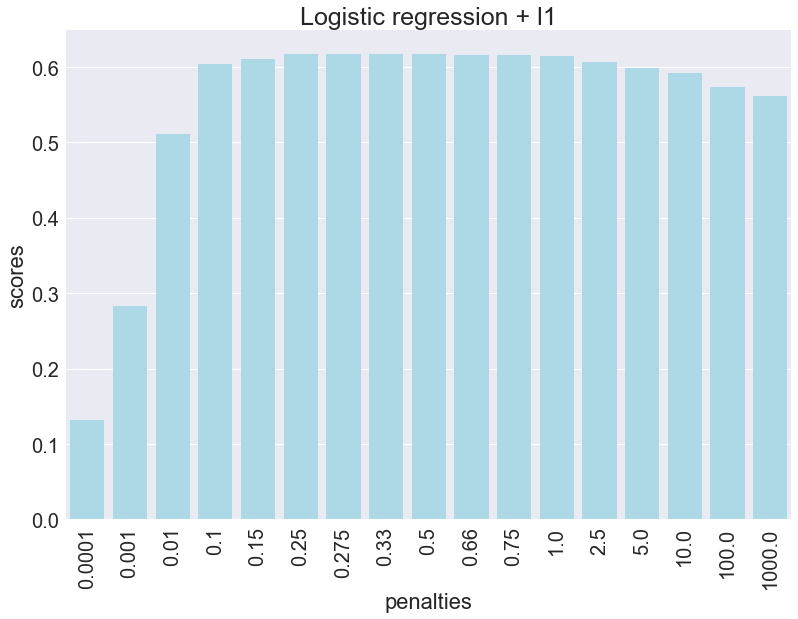

In [79]:
import seaborn as sns
# topics = df['topic_name'].value_counts().head(24).to_frame()
# topics = topics.reset_index()
# topics.columns = ['topic', 'number_of_publications']
# topics = topics[topics['topic'] != 'Not related to Ukraine']



plt.figure(figsize=(13, 9))
sns.set_style("whitegrid")
sns.set(font_scale=2)
ax = sns.barplot(x='penalty', y='l1', color ='lightblue', data=scores_df, saturation=2)
ax.set_title('Logistic regression + l1', fontsize = 25)
ax.set(xlabel='penalties', ylabel='scores')
plt.xticks(rotation=90)
plt.show()